In [3]:
import pandas as pd
import os
from tqdm import tqdm

# Define the file path
folder_path = r'D:\Research\Phong\ToolTrackingCholec80_Project\centroid'

# List all files in the folder
file_names = os.listdir(folder_path)

# Initialize a dictionary to store class ID counts across all files
class_id_counts = {}

# Loop through each file
for file_name in tqdm(file_names, desc='Processing csv files'):
    if file_name.endswith('.csv'):
        # Read the CSV file
        df = pd.read_csv(os.path.join(folder_path, file_name))

        # # Assuming 'centroid' contains tuples as strings, convert them to actual tuples
        # df['centroid'] = df['centroid'].apply(lambda x: tuple(round(float(coord), 4) for coord in x.strip('()').split(',')))

        # # Filter based on 'Class ID'
        # classID_df = df[df['Class ID'] == 0]

        # # Get the right hand tool
        # filtered_df = classID_df[classID_df['centroid'].apply(lambda x: x[0] > 0.5)]

        # Count occurrences of each 'Class ID' in the filtered DataFrame
        class_id_counts_file = df['Class ID'].value_counts().to_dict()

        # Update overall class ID counts with counts from current file
        for class_id, count in class_id_counts_file.items():
            if class_id in class_id_counts:
                class_id_counts[class_id] += count
            else:
                class_id_counts[class_id] = count

# Print the overall counts of each 'Class ID' across all files
print("Overall Class ID Counts:")
for class_id, count in class_id_counts.items():
    print(f"Class ID {class_id}: {count}")


Processing csv files: 100%|██████████| 80/80 [00:11<00:00,  7.19it/s]

Overall Class ID Counts:
Class ID 2: 2892022
Class ID 1: 2552677
Class ID 4: 227298
Class ID 0: 177226
Class ID 5: 125790
Class ID 6: 113428
Class ID 7: 442


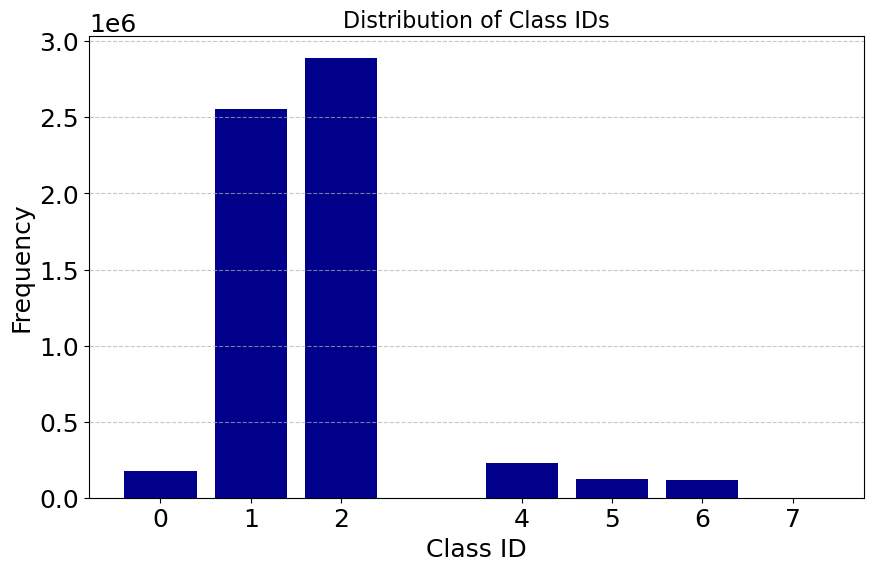

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Overall   Counts
class_id_counts = {
    2: 2892022,
    1: 2552677,
    4: 227298,
    0: 177226,
    5: 125790,
    6: 113428,
    7: 442,
}

# Extract Class IDs and corresponding counts
class_ids = list(class_id_counts.keys())
counts = list(class_id_counts.values())

# Increase font size by a factor of 1.5
mpl.rcParams.update({'font.size': 12})  # Default font size
mpl.rcParams['axes.labelsize'] = 12 * 1.5
mpl.rcParams['axes.titlesize'] = 14 * 1.5
mpl.rcParams['xtick.labelsize'] = 12 * 1.5
mpl.rcParams['ytick.labelsize'] = 12 * 1.5

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_ids, counts, color='darkblue')
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Distribution of Class IDs', fontsize=16)
plt.xticks(class_ids)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
